In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/ss.csv")

In [ ]:
df.sample(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
316,317,Female,53,Engineer,8.5,9,30,3,Normal,125/80,65,5000,NaN
263,264,Female,45,Manager,6.9,7,55,5,Overweight,125/82,75,5500,NaN
73,74,Male,33,Doctor,6.1,6,30,8,Normal,125/80,72,5000,NaN
80,81,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea
147,148,Male,39,Engineer,6.5,5,40,7,Overweight,132/87,80,4000,Insomnia


In [ ]:
df.shape

(373, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                373 non-null    int64  
 1   Gender                   373 non-null    object 
 2   Age                      373 non-null    int64  
 3   Occupation               373 non-null    object 
 4   Sleep Duration           373 non-null    float64
 5   Quality of Sleep         373 non-null    int64  
 6   Physical Activity Level  373 non-null    int64  
 7   Stress Level             373 non-null    int64  
 8   BMI Category             373 non-null    object 
 9   Blood Pressure           373 non-null    object 
 10  Heart Rate               373 non-null    int64  
 11  Daily Steps              373 non-null    int64  
 12  Sleep Disorder           154 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.0+ KB


In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,187.000000,42.139410,7.129491,7.308311,59.128686,5.391421,70.171582,6816.353887
std,107.820066,8.640793,0.795139,1.195359,20.842589,1.772590,4.139704,1620.060932
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.000000,35.000000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.000000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.000000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,373.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
df.duplicated().any()

False

In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
df.drop(['Person ID'],axis=1,inplace=True)

Average age of the people who have heart beat greater than 80

In [ ]:
df[df["Heart Rate"]>80]["Age"].mean()

37.333333333333336

In [ ]:
df[df['Sleep Disorder'] !=None]["Sleep Duration"].mean()

7.129490616621984

In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
cat_features=['Gender','Occupation','BMI Category','Sleep Disorder']

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in cat_features:
  df[i]=l.fit_transform(df[i])

In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,9,6.1,6,42,6,3,126/83,77,4200,2
1,1,28,1,6.2,6,60,8,0,125/80,75,10000,2
2,1,28,1,6.2,6,60,8,0,125/80,75,10000,2
3,1,28,6,5.9,4,30,8,2,140/90,85,3000,1
4,1,28,6,5.9,4,30,8,2,140/90,85,3000,1


In [ ]:
def systolic_finder(x):
  return int(x.split("/")[0])
df["systolic Pressure"]=df['Blood Pressure'].apply(systolic_finder)

In [ ]:
def diastolic_finder(x):
  return int(x.split("/")[1])
df["diastolic_pressure"]=df['Blood Pressure'].apply(diastolic_finder)

In [ ]:
df.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,systolic Pressure,diastolic_pressure
0,1,27,9,6.1,6,42,6,3,126/83,77,4200,2,126,83
1,1,28,1,6.2,6,60,8,0,125/80,75,10000,2,125,80


In [ ]:
df.drop("Blood Pressure",axis=1,inplace=True)

In [ ]:
df.head(1)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic Pressure,diastolic_pressure
0,1,27,9,6.1,6,42,6,3,77,4200,2,126,83


In [ ]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'systolic Pressure',
       'diastolic_pressure'],
      dtype='object')

Average sleep duration of the people who have stress levels >=8

In [ ]:
df[df["Stress Level"]>=8]['Sleep Duration'].mean()

6.050000000000002

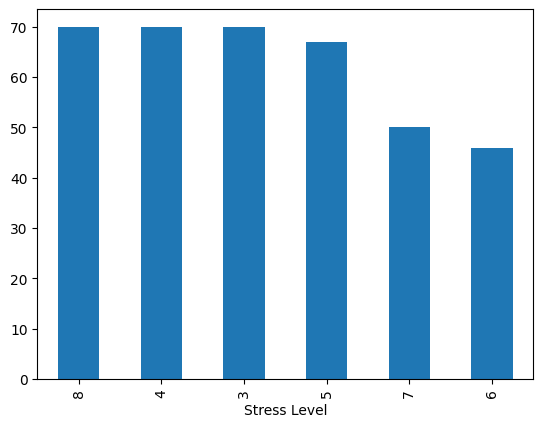

In [ ]:
df['Stress Level'].value_counts().plot(kind="bar")
plt.show()

<ipython-input-25-4b4e5aae6fc1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['diastolic_pressure'])


<Axes: xlabel='diastolic_pressure', ylabel='Density'>

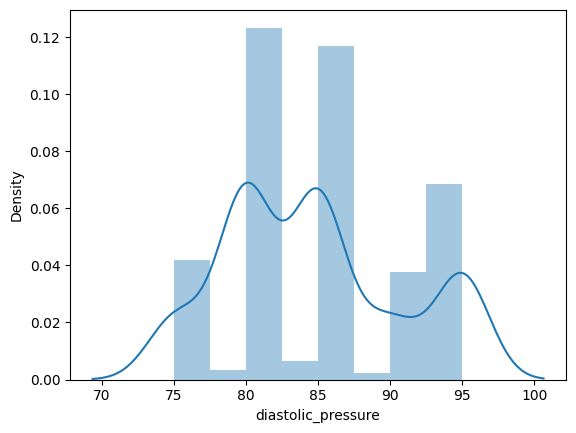

In [ ]:
sns.distplot(df['diastolic_pressure'])

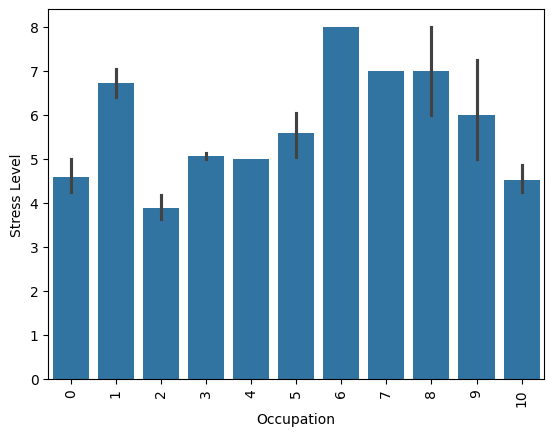

In [ ]:
sns.barplot(x=df['Occupation'],y=df['Stress Level'])
plt.xticks(rotation=90)
plt.show()

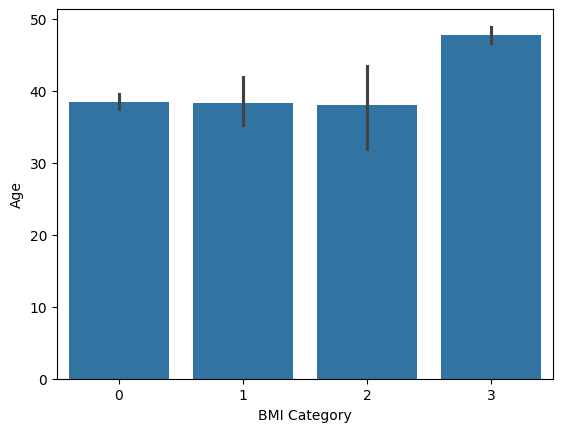

In [ ]:
sns.barplot(x=df['BMI Category'],y=df['Age'])
plt.show()

<ipython-input-28-6ed014a30d79>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


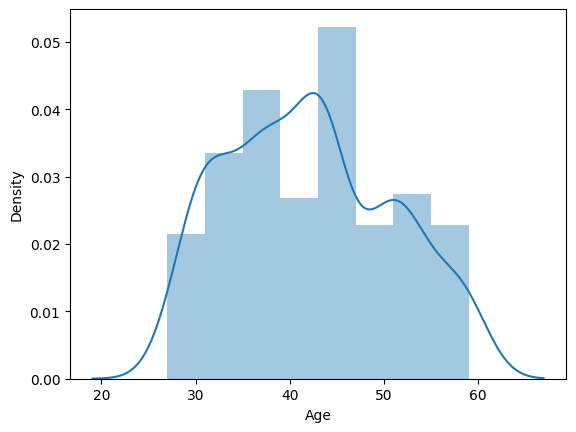

In [ ]:
sns.distplot(df["Age"])
plt.show()

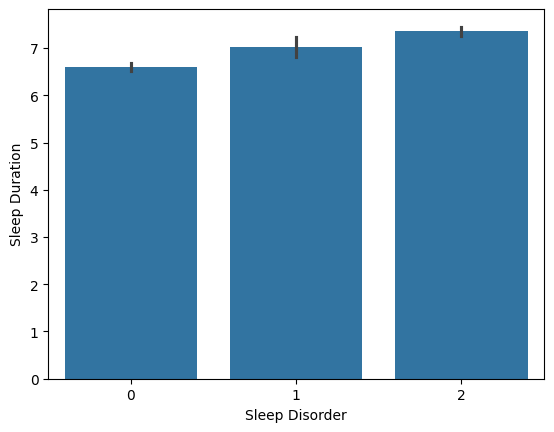

In [ ]:
sns.barplot(x=df["Sleep Disorder"],y=df["Sleep Duration"])
plt.show()

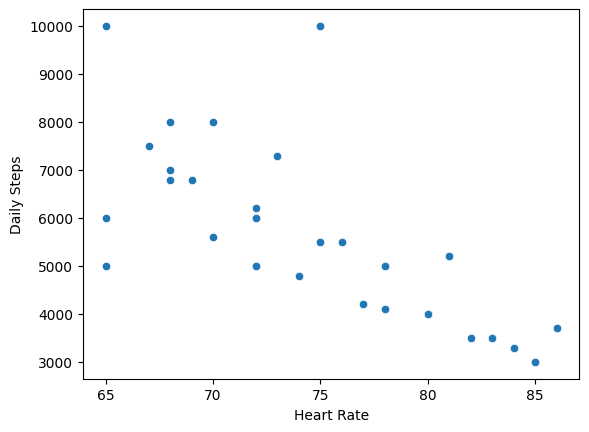

In [ ]:
sns.scatterplot(x=df["Heart Rate"],y=df["Daily Steps"])
plt.show()

obsevations from above graph
1)heart rate is indirectly proportional with Daily steps walking
2)by increasing daily steps heart rate becomes normal

In [ ]:
df.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic Pressure,diastolic_pressure
0,1,27,9,6.1,6,42,6,3,77,4200,2,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,2,125,80


<Axes: xlabel='Heart Rate', ylabel='systolic Pressure'>

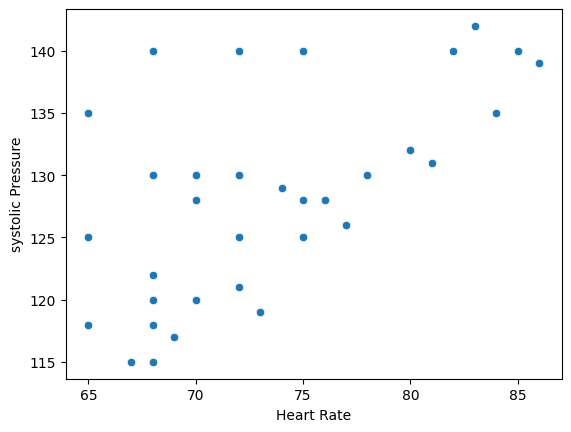

In [ ]:
sns.scatterplot(x=df['Heart Rate'],y=df['systolic Pressure'])

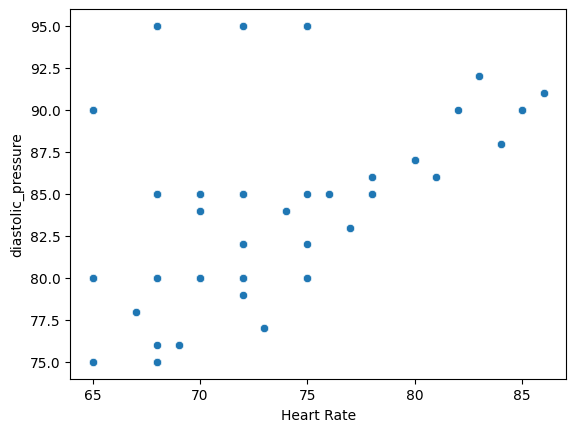

In [ ]:
sns.scatterplot(x=df['Heart Rate'],y=df['diastolic_pressure'])
plt.show()

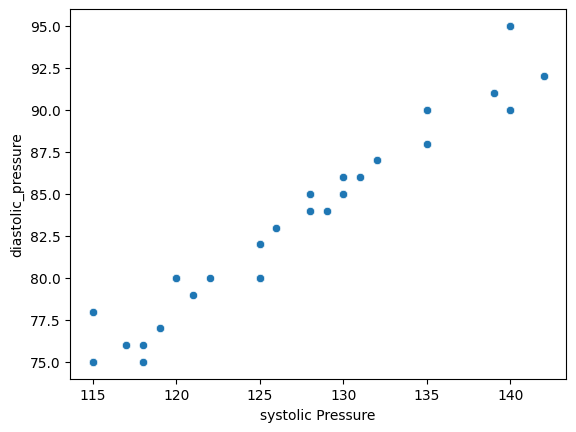

In [ ]:
sns.scatterplot(x=df['systolic Pressure'],y=df['diastolic_pressure'])
plt.show()

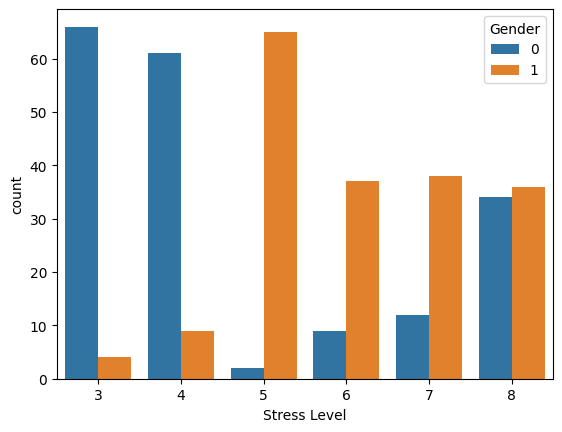

In [ ]:
sns.countplot(x=df["Stress Level"],hue=df['Gender'])
plt.show()

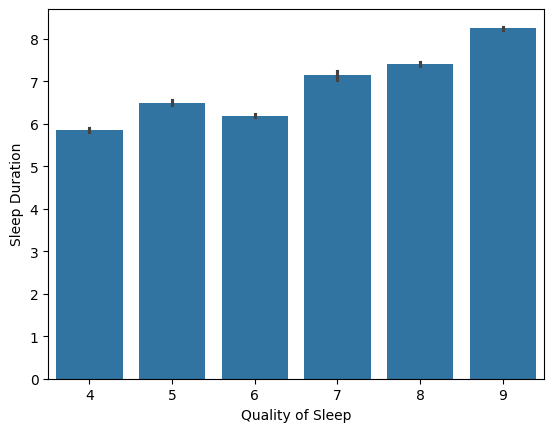

In [ ]:
sns.barplot(x=df['Quality of Sleep'],y=df['Sleep Duration'])
plt.show()

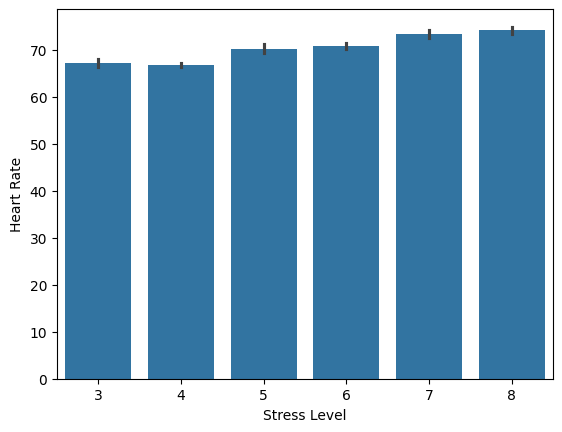

In [ ]:
sns.barplot(x=df['Stress Level'],y=df['Heart Rate'])
plt.show()

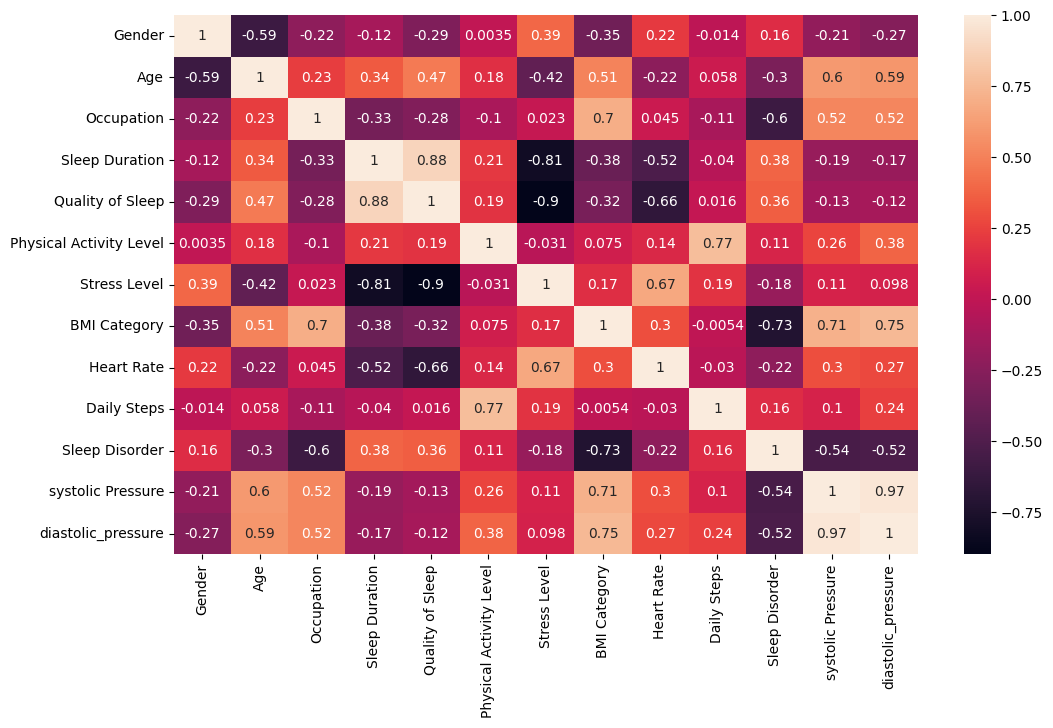

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,fmt=".2g")
plt.show()

Stress levels mainly depends upon heart rate,quality of sleep,sleep duration,age,gender

In [ ]:
x=df.drop("Stress Level",axis=1)
y=df["Stress Level"]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()

In [ ]:
param_grid={'n_estimators':[100,150,125]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(model1,param_grid,cv=5)

In [ ]:
grid_search.fit(x,y)
print(grid_search.best_params_)

{'n_estimators': 125}


In [ ]:
model1=RandomForestClassifier(n_estimators=100,max_depth=6)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
model1.fit(x_train,y_train)

RandomForestClassifier(max_depth=6)

In [ ]:
y_pred=model1.predict(x_test)
y_pred

array([6, 8, 8, 7, 4, 4, 8, 6, 4, 4, 4, 3, 7, 6, 4, 8, 7, 4, 5, 5, 5, 5,
       7, 3, 8, 3, 4, 4, 7, 8, 8, 5, 5, 4, 7, 8, 8, 6, 8, 8, 8, 4, 8, 3,
       4, 8, 4, 5, 6, 6, 3, 5, 7, 3, 6, 8, 8, 7, 7, 8, 3, 8, 8, 5, 8, 8,
       3, 7, 7, 3, 6, 6, 7, 7, 8])

test set accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9866666666666667

training set accuracy

In [ ]:
a=model1.predict(x_train)
accuracy_score(a,y_train)

0.9932885906040269

Due to less data model gives high accuracy if we have large dataset then accuracy becomes normal